Aquí irá la descripcion general del programa

In [7]:
# Datos a ingresar por parte del usuario *************
fc = 28.0       # f'c del concreto (En MPa)
fy = 420.0      # fy del acero (En MPa)
h = 0.5         # Ancho de la sección (En m)------Debe ser el eje débil en Biaxial
b = 0.3         # Profundidad de la sección (En m)
r = 0.05        # Recubrimiento (En m)

# Datos de uso intero del programa
beta = 0.85                                    # Ojo si f'c > 5000 psi
d = h - r
n = 100                                        # Cantidad de puntos
c = [i*(5*h - r)/n + r for i in range(n+1)]    # Distancia al eje neutro
a = []                                         # Longitud del bloque de compresión equivalente
for i in range(len(c)):
    if c[i] > h/beta:
        a.append(h)
    else:
        a.append(beta*c[i])

cuantias = [0.01, 0.02, 0.03, 0.04]
E = 210000.0                                   # Módulo de elasticidad del acero (En MPa)
epsilon_c = -0.003

# Compatibilidad de deformaciones
def_compresion = [(1 - r/i)*epsilon_c for i in c]
def_traccion = [(h/i - 1 - r/i)*(-epsilon_c) for i in c]

# Esfuerzo en el acero a compresion
esf_compresion = []
for i in range(len(def_compresion)):
    if abs(def_compresion[i]) <= (fy/E):
        esf_compresion.append(E*def_compresion[i])
    else:
        esf_compresion.append(-fy)

# Esfuerzo en el acero a tracción
esf_traccion = []
for i in range(len(def_traccion)):
    if def_traccion[i] <= (-fy/E):
        esf_traccion.append(-fy)
    elif -fy/E < def_traccion[i] < fy/E:
        esf_traccion.append(E*def_traccion[i])
    else:
        esf_traccion.append(fy)

# Cargas Axiales Nominales para cada cuantía **********
Pn1 = []
for i in range(len(c)):
    Pn1.append(0.85*fc*a[i]*b - esf_compresion[i]*(cuantias[0]*h*b/2) - esf_traccion[i]*(cuantias[0]*h*b/2))
    
Pn2 = []
for i in range(len(c)):
    Pn2.append(0.85*fc*a[i]*b - esf_compresion[i]*(cuantias[1]*h*b/2) - esf_traccion[i]*(cuantias[1]*h*b/2))
    
Pn3 = []
for i in range(len(c)):
    Pn3.append(0.85*fc*a[i]*b - esf_compresion[i]*(cuantias[2]*h*b/2) - esf_traccion[i]*(cuantias[2]*h*b/2))
    
Pn4 = []
for i in range(len(c)):
    Pn4.append(0.85*fc*a[i]*b - esf_compresion[i]*(cuantias[3]*h*b/2) - esf_traccion[i]*(cuantias[3]*h*b/2))
# *****************************************************

# Momentos Nominales para cada cuantía ****************
Mn1 = []
for i in range(len(c)):
    Mn1.append(0.85*fc*a[i]*b*(h/2 - a[i]/2) + (-1)*esf_compresion[i]*(cuantias[0]*h*b/2)*(h/2 - r) + esf_traccion[i]*(cuantias[0]*h*b/2)*(d - h/2))

Mn2 = []
for i in range(len(c)):
    Mn2.append(0.85*fc*a[i]*b*(h/2 - a[i]/2) + (-1)*esf_compresion[i]*(cuantias[1]*h*b/2)*(h/2 - r) + esf_traccion[i]*(cuantias[1]*h*b/2)*(d - h/2))
    
Mn3 = []
for i in range(len(c)):
    Mn3.append(0.85*fc*a[i]*b*(h/2 - a[i]/2) + (-1)*esf_compresion[i]*(cuantias[2]*h*b/2)*(h/2 - r) + esf_traccion[i]*(cuantias[2]*h*b/2)*(d - h/2))
    
Mn4 = []
for i in range(len(c)):
    Mn4.append(0.85*fc*a[i]*b*(h/2 - a[i]/2) + (-1)*esf_compresion[i]*(cuantias[3]*h*b/2)*(h/2 - r) + esf_traccion[i]*(cuantias[3]*h*b/2)*(d - h/2))
# *****************************************************

# Cargas axiales y momentos últimos *******************
Pu1 = [] ; Mu1 = []
for i in range(len(c)):
    if Pn1[i] >= Pn1[Mn1.index(max(Mn1))]:
        Pu1.append(0.65*Pn1[i])                        # 0.65 para columnas con estribos; 0.75 para col. zunchadas
        Mu1.append(0.65*Mn1[i])
    else:
        if def_traccion[i] < 0.002:
            Pu1.append(0.65*Pn1[i])
            Mu1.append(0.65*Mn1[i])
        elif (0.002 <= def_traccion[i] <= 0.005):
            Pu1.append((0.65 + (250/3)*(def_traccion[i] - 0.002))*Pn1[i])
            Mu1.append((0.65 + (250/3)*(def_traccion[i] - 0.002))*Mn1[i])
        else:
            Pu1.append(0.90*Pn1[i])
            Mu1.append(0.90*Mn1[i])

Pu2 = [] ; Mu2 = []
for i in range(len(c)):
    if Pn2[i] >= Pn2[Mn2.index(max(Mn2))]:
        Pu2.append(0.65*Pn2[i])                        # 0.65 para columnas con estribos; 0.75 para col. zunchadas
        Mu2.append(0.65*Mn2[i])
    else:
        if def_traccion[i] < 0.002:
            Pu2.append(0.65*Pn2[i])
            Mu2.append(0.65*Mn2[i])
        elif (0.002 <= def_traccion[i] <= 0.005):
            Pu2.append((0.65 + (250/3)*(def_traccion[i] - 0.002))*Pn2[i])
            Mu2.append((0.65 + (250/3)*(def_traccion[i] - 0.002))*Mn2[i])
        else:
            Pu2.append(0.90*Pn2[i])
            Mu2.append(0.90*Mn2[i])

Pu3 = [] ; Mu3 = []
for i in range(len(c)):
    if Pn3[i] >= Pn3[Mn3.index(max(Mn3))]:
        Pu3.append(0.65*Pn3[i])                        # 0.65 para columnas con estribos; 0.75 para col. zunchadas
        Mu3.append(0.65*Mn3[i])
    else:
        if def_traccion[i] < 0.002:
            Pu3.append(0.65*Pn3[i])
            Mu3.append(0.65*Mn3[i])
        elif (0.002 <= def_traccion[i] <= 0.005):
            Pu3.append((0.65 + (250/3)*(def_traccion[i] - 0.002))*Pn3[i])
            Mu3.append((0.65 + (250/3)*(def_traccion[i] - 0.002))*Mn3[i])
        else:
            Pu3.append(0.90*Pn3[i])
            Mu3.append(0.90*Mn3[i])

Pu4 = [] ; Mu4 = []
for i in range(len(c)):
    if Pn4[i] >= Pn4[Mn4.index(max(Mn4))]:
        Pu4.append(0.65*Pn4[i])                        # 0.65 para columnas con estribos; 0.75 para col. zunchadas
        Mu4.append(0.65*Mn4[i])
    else:
        if def_traccion[i] < 0.002:
            Pu4.append(0.65*Pn4[i])
            Mu4.append(0.65*Mn4[i])
        elif (0.002 <= def_traccion[i] <= 0.005):
            Pu4.append((0.65 + (250/3)*(def_traccion[i] - 0.002))*Pn4[i])
            Mu4.append((0.65 + (250/3)*(def_traccion[i] - 0.002))*Mn4[i])
        else:
            Pu4.append(0.90*Pn4[i])
            Mu4.append(0.90*Mn4[i])
# *******************************************************

In [8]:
# Datos para el diseño (solicitaciones)

# Solicitaciones del análisis estructural
M_max = 0.4
M_min = 0.2
P_max = 2
P_min = 1
rho = 0.025     # Cuantía de diseño

P = []
for i in range(len(c)):
    P.append(0.85*fc*a[i]*b - esf_compresion[i]*(rho*h*b/2) - esf_traccion[i]*(rho*h*b/2))
    
M = []
for i in range(len(c)):
    M.append(0.85*fc*a[i]*b*(h/2 - a[i]/2) + (-1)*esf_compresion[i]*(rho*h*b/2)*(h/2 - r) + esf_traccion[i]*(rho*h*b/2)*(d - h/2))

Pu = [] ; Mu = []
for i in range(len(c)):
    if P[i] >= P[M.index(max(M))]:
        Pu.append(0.65*P[i])                        # 0.65 para columnas con estribos; 0.75 para col. zunchadas
        Mu.append(0.65*M[i])
    else:
        if def_traccion[i] < 0.002:
            Pu.append(0.65*P[i])
            Mu.append(0.65*M[i])
        elif (0.002 <= def_traccion[i] <= 0.005):
            Pu.append((0.65 + (250/3)*(def_traccion[i] - 0.002))*P[i])
            Mu.append((0.65 + (250/3)*(def_traccion[i] - 0.002))*M[i])
        else:
            Pu.append(0.90*P[i])
            Mu.append(0.90*M[i])

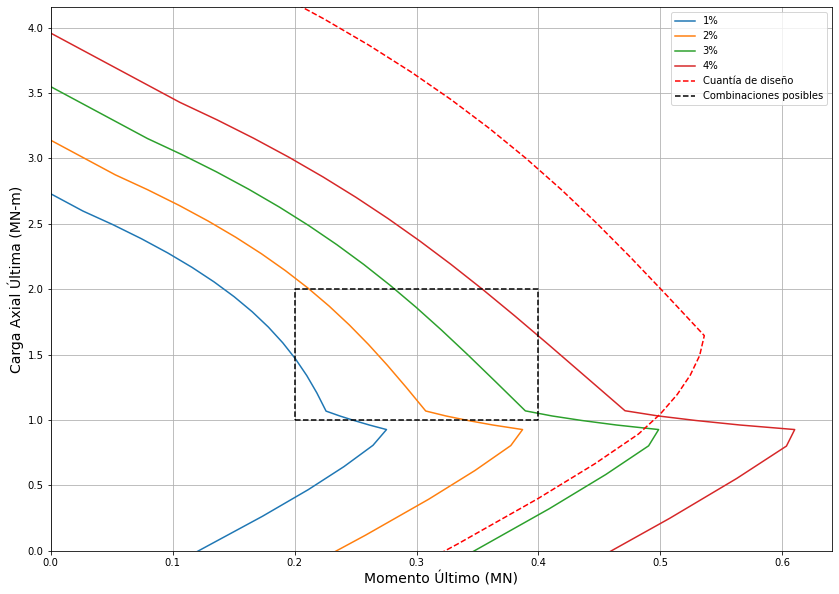

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.plot(Mu1, Pu1, label='1%')
plt.plot(Mu2, Pu2, label='2%')
plt.plot(Mu3, Pu3, label='3%')
plt.plot(Mu4, Pu4, label='4%')
plt.plot(M, P, 'r--', label='Cuantía de diseño')
plt.plot([M_min, M_max, M_max, M_min, M_min], [P_min, P_min, P_max, P_max, P_min], 'k--', label='Combinaciones posibles')
plt.legend()
plt.xlim(0, 1.05*max(Mu4))
plt.ylim(0, 1.05*max(Pu4))
plt.grid()
plt.xlabel('Momento Último (MN)', size=14)
plt.ylabel('Carga Axial Última (MN-m)', size=14)
plt.show;